In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('D:\\Local Disk C programs\\XGBM & LGBM\\Titanic_train.csv')
test_data = pd.read_csv('D:\\Local Disk C programs\\XGBM & LGBM\\Titanic_test.csv')

In [2]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

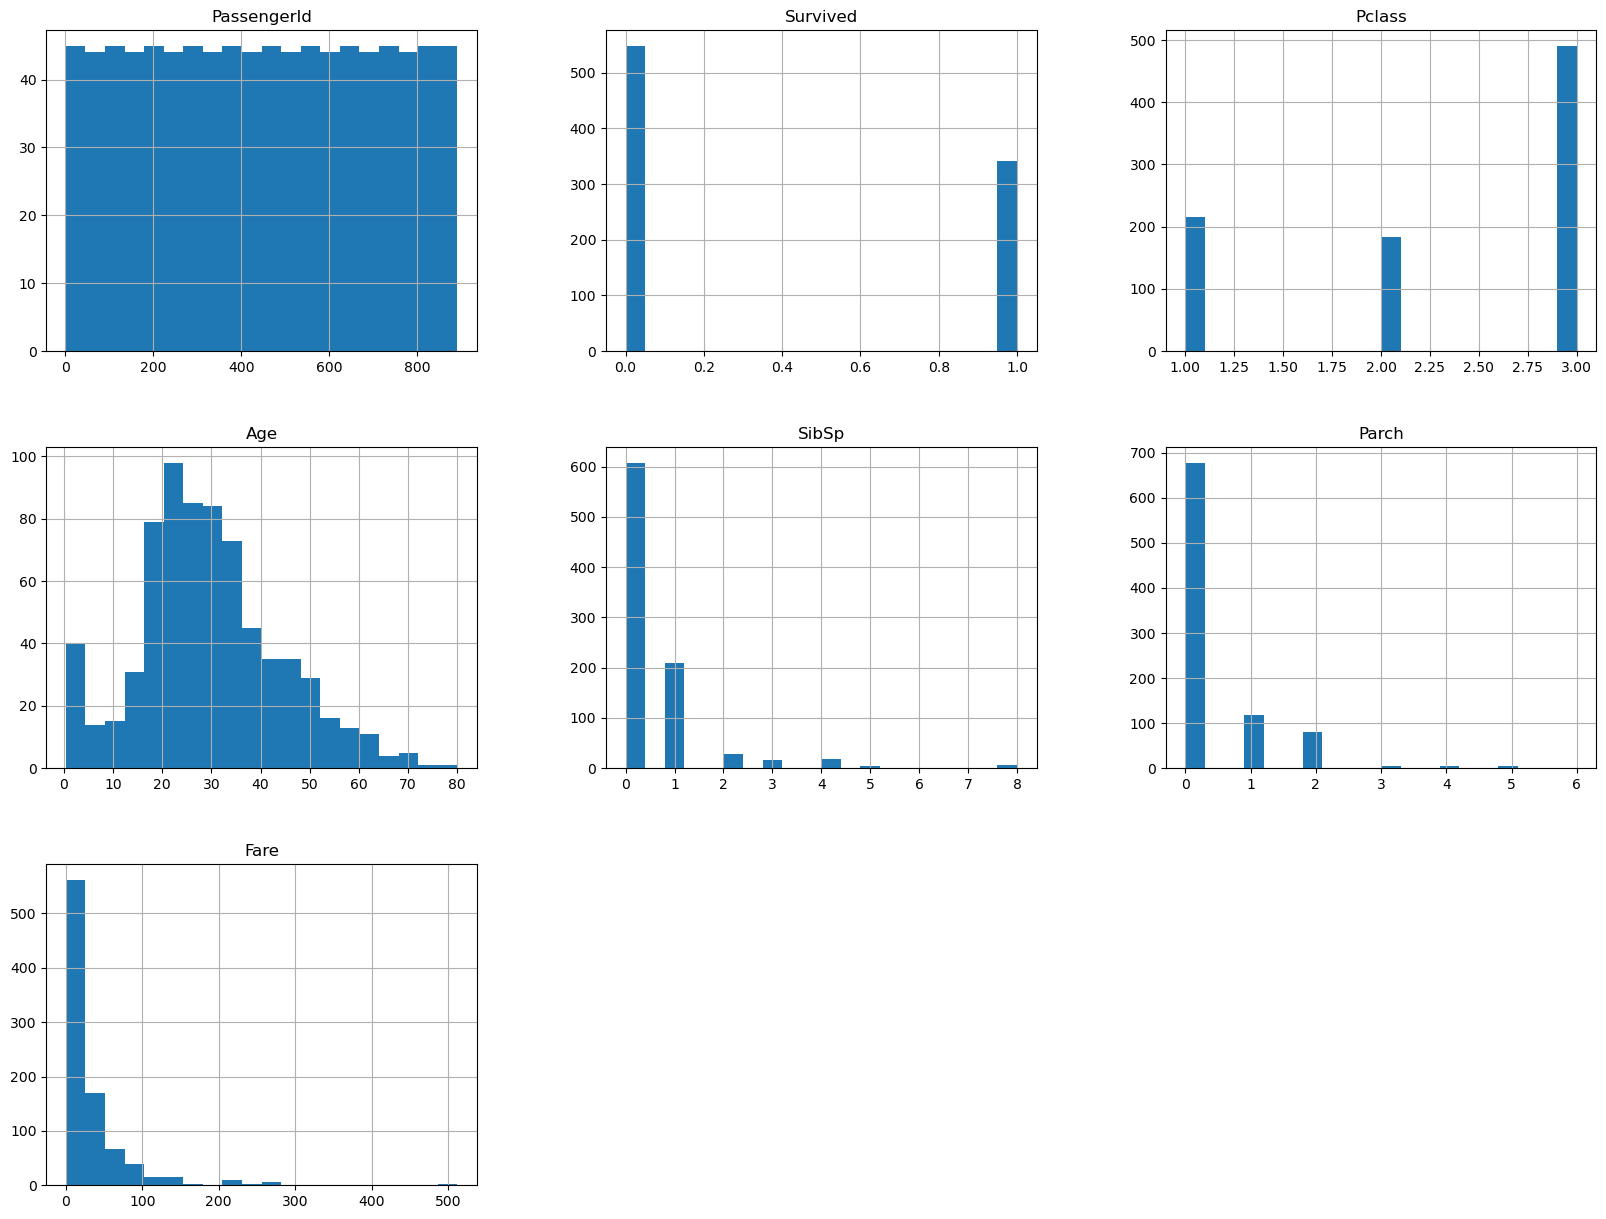

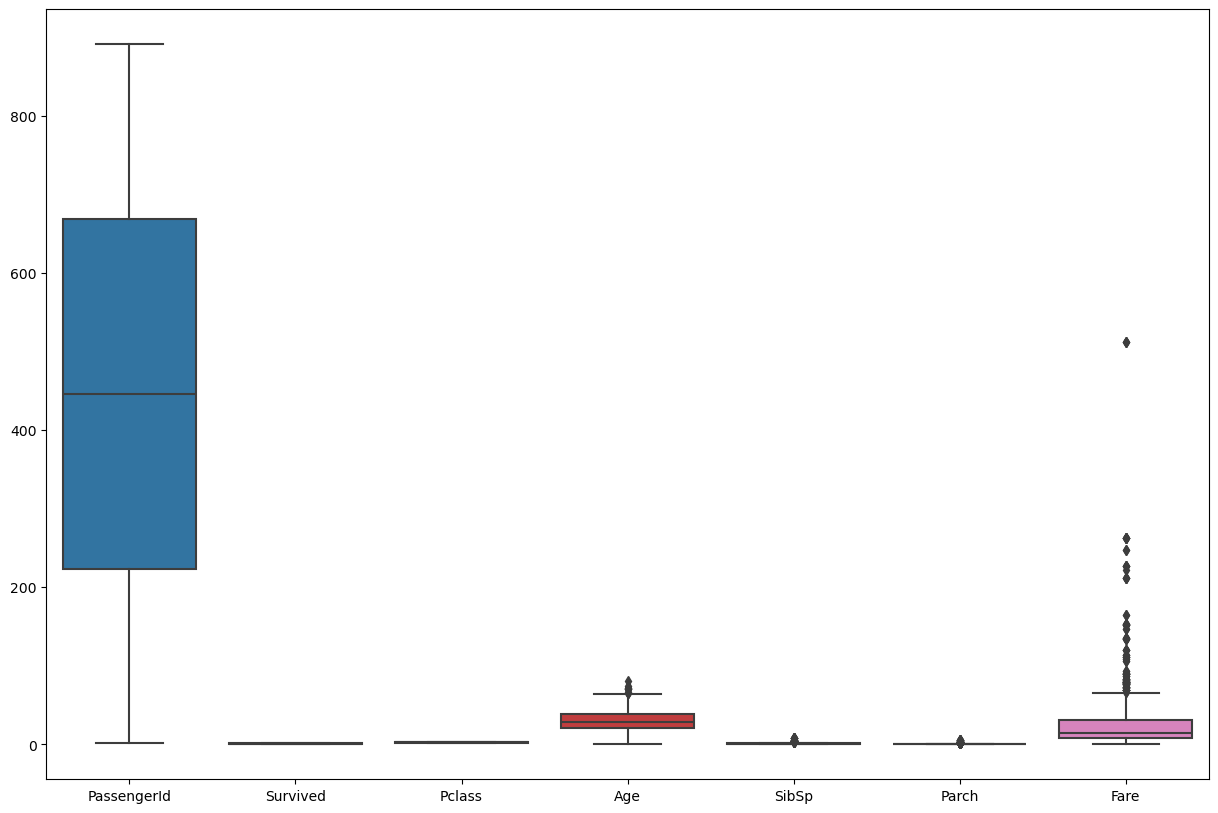

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data.select_dtypes(include=['float64', 'int64']))
plt.show()

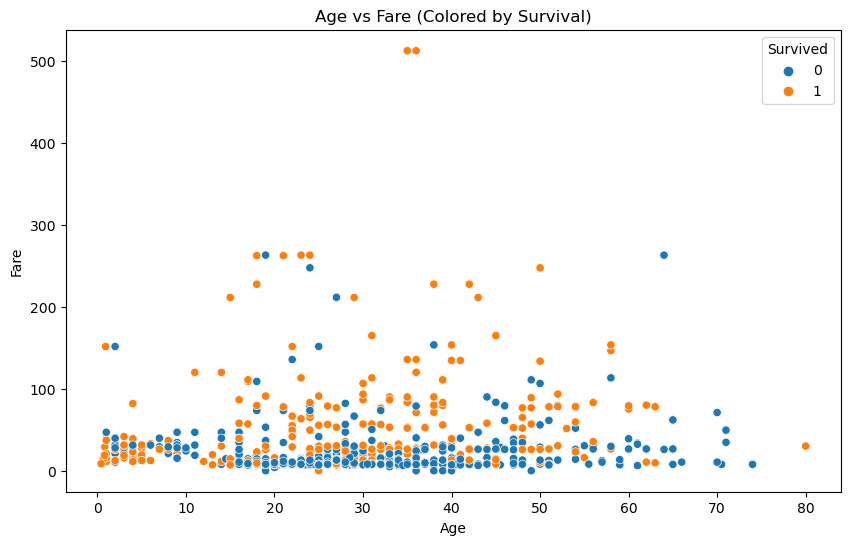

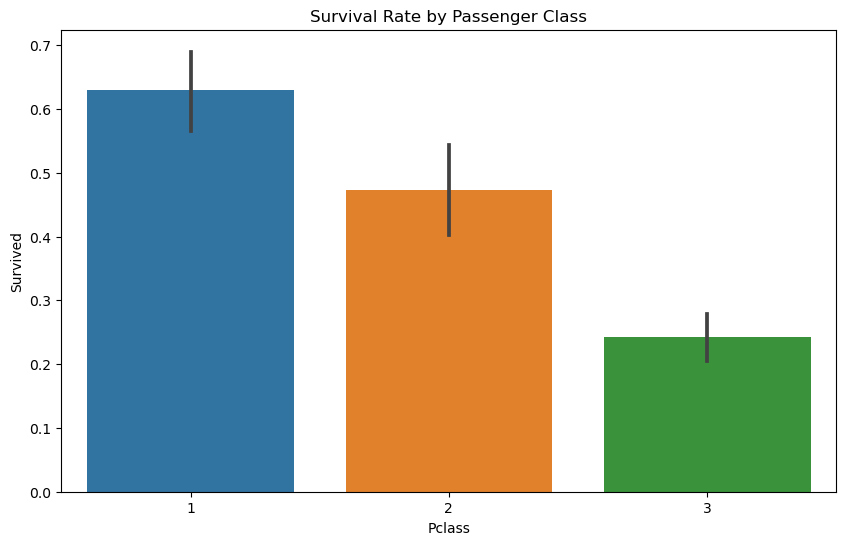

In [8]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

# Bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [9]:
# Fill missing values for numerical features with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Fill missing values for categorical features with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

train_data.isnull().sum(), test_data.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

In [10]:
# One-hot encoding for categorical features
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

# Align the train and test data
train_data, test_data = train_data.align(test_data, join='left', axis=1)

# Fill any remaining NaNs with 0s (due to alignment issues)
test_data.fillna(0, inplace=True)

train_data.head(), test_data.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
 2                             Heikkinen, Miss. Laina  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
 4                           Allen, Mr. William Henry  35.0      0      0   
 
              Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
 0         A/5 21171   7.2500   NaN           0         1           0   
 1          PC 17599  71.2833   C85           1         0           1   
 2  STON/O2. 3101282   7.9250   NaN           1         0           0   
 3            113803

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 871.5 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 871.5 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 871.5 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 871.5 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 294.4 kB/s eta 0:00:05
   ------ --------------------------------- 0.2/1.3 MB 655.6 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 654.2 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 752.2 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 752.2 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 752.2 kB/s eta 0:00:02
   --------- 

In [14]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 550.5 kB/s eta 0:03:02
   ---------------------------------------- 0.1/99.8 MB 550.5 kB/s eta 0:03:02
   ---------------------------------------- 0.1/99.8 MB 550.5 kB/s eta 0:03:02
   ---------------------------------------- 0.1/99.8 MB 550.5 kB/s eta 0:03:02
   ---------------------------------------- 0.1/99.8 MB 550.5 kB/s eta 0:03:02
   ---------------------------------------- 0.2/99.8 MB 499.5 kB/s eta 0:03:20
   ---------------------------------------- 0.2/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.2/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.2/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.3/99.8 MB 517.0 kB/s eta 0:03:13


In [23]:
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the models
metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_lgb), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_xgb)],
    'F1-Score': [f1_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_xgb)]
}

metrics_df = pd.DataFrame(metrics, index=['LightGBM', 'XGBoost'])
metrics_df

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Accuracy,Precision,Recall,F1-Score
LightGBM,0.804469,0.774648,0.743243,0.758621
XGBoost,0.782123,0.739726,0.729730,0.734694


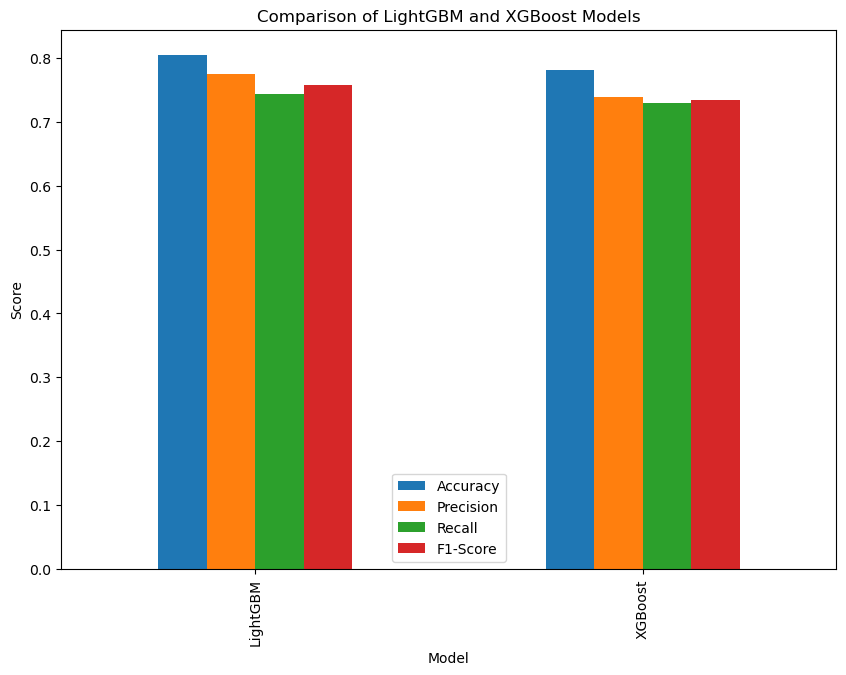

In [24]:
# Comparing the performance metrics of LightGBM and XGBoost models
metrics_df.plot(kind='bar', figsize=(10, 7))
plt.title('Comparison of LightGBM and XGBoost Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()